#Implement Momentum Strategy using Machine Learning

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


##Importing the libraries

In [35]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import datetime
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from __future__ import division
import pytz

###Please Note that I am considering my own portfolio stokes to study and predict the momentum strategy. 

In [44]:
symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'SBIN.NS', 'HDFCBANK.NS', 'HDFC.NS', 'TITAN.NS', 'HEROMOTOCO.NS', 'TATAMOTORS.NS', 'BPCL.NS']
start_date = datetime(2018, 8, 1)
end_date = datetime(2022, 8, 1)

In [77]:
import yfinance as yf
import pandas as pd
from datetime import datetime

symbols = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'SBIN.NS', 'HDFCBANK.NS', 'HDFC.NS', 'TITAN.NS', 'HEROMOTOCO.NS', 'TATAMOTORS.NS', 'BPCL.NS']
start_date = datetime(2018, 8, 1)
end_date = datetime(2022, 8, 1)

# Create an empty list to store the historical data for each symbol
data_list = []

# Loop through the list of symbols and download the historical data for each symbol
for symbol in symbols:
    data = yf.download(symbol, start=start_date, end=end_date)
    # Add a 'Symbol' column to the downloaded data with the symbol value
    if not data.empty:
        
    # Add a 'Symbol' column to the downloaded data with the symbol value
        data['Symbol'] = symbol
        data_list.append(data)

# Concatenate the data for all symbols vertically into a single DataFrame
data_df = pd.concat(data_list, axis=0)

# Print the first few rows of the concatenated DataFrame
print(data_df.head())


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-08-01  1179.222168  1191.604736  1174.269043  1181.153809  1163.000732   
2018-08-02  1180.311768  1180.311768  1155.001709  1157.379150  1139.5913

In [93]:
datas = pd.DataFrame(data_df)
datas.reset_index(inplace=True)

In [95]:
datas[datas.Symbol=='INFY.NS'].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,signal,short_mavg,long_mavg,EMA21,EMA63,EMA252,ROC21,ROC63,MOM21,MOM63
1972,2018-08-01,681.900024,684.224976,675.500000,677.025024,601.375183,4675706,INFY.NS,0.0,3113.337512,3428.077284,2957.217600,3202.795242,3380.749448,-79.072193,-80.730203,-2638.075073,-2802.724976
1973,2018-08-02,679.799988,683.375000,675.075012,676.825012,601.197571,5940742,INFY.NS,0.0,3028.833348,3402.522076,2749.909183,3123.858672,3359.374548,-78.956409,-80.282439,-2558.225037,-2836.574890
1974,2018-08-03,683.099976,683.099976,678.000000,682.049988,605.838745,3970390,INFY.NS,0.0,2944.136682,3376.867909,2561.921983,3047.552151,3338.209924,-79.083033,-80.202317,-2534.250061,-2750.550110
1975,2018-08-06,683.025024,687.500000,673.750000,680.325012,604.306396,6178930,INFY.NS,0.0,2856.520848,3351.117700,2390.867713,2973.576303,3317.198973,-79.307907,-80.215921,-2580.424988,-2764.775085
1976,2018-08-07,687.000000,689.974976,680.325012,683.974976,607.548706,7351528,INFY.NS,0.0,2769.550010,3326.026242,2235.695646,2902.026261,3296.382969,-79.054189,-79.953840,-2603.875122,-2754.775024


In [96]:
# Initialize the `signals` DataFrame with the `signal` column
datas['signal'] = 0.0

# Create short simple moving average over the short window
datas['short_mavg'] = datas['Close'].rolling(window=30, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
datas['long_mavg'] = datas['Close'].rolling(window=120, min_periods=1, center=False).mean()

# Create signals
datas['signal'] = np.where(datas['short_mavg'] > datas['long_mavg'], 1.0, 0.0)  

In [99]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
datas['EMA21'] = EMA(datas, 21)
datas['EMA63'] = EMA(datas, 63)
datas['EMA252'] = EMA(datas, 252)
datas.head()

#calculation of rate of change
def ROC(df, n):  
    M = df.diff(n - 1)  
    N = df.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC
datas['ROC21'] = ROC(datas['Close'], 21)
datas['ROC63'] = ROC(datas['Close'], 63)

#Calculation of price momentum
def MOM(df, n):   
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))   
    return MOM
datas['MOM21'] = MOM(datas['Close'], 21)
datas['MOM63'] = MOM(datas['Close'], 63)

#calculation of relative strength index
def RSI(series, period):
    delta = series.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean(u[:period]) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean(d[:period]) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = u.ewm(com=period-1, adjust=False).mean()
    rd = d.ewm(com=period-1, adjust=False).mean()
    return 100 - 100 / (1 + rs / rd)
datas['RSI21'] = RSI(datas['Close'], 21)
datas['RSI63'] = RSI(datas['Close'], 63)
datas['RSI252'] = RSI(datas['Close'], 252)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
    min_low = low.rolling(n).min()
    max_high = high.rolling(n).max()
    stok = ((close - min_low) / (max_high - min_low)) * 100
    return stok

def STOD(close, low, high, n):
    min_low = low.rolling(n).min()
    max_high = high.rolling(n).max()
    stok = ((close - min_low) / (max_high - min_low)) * 100
    stod = stok.rolling(3).mean()
    return stod
datas['%K21'] = STOK(datas['Close'], datas['Low'], datas['High'], 21)
datas['%D21'] = STOD(datas['Close'], datas['Low'], datas['High'], 21)
datas['%K63'] = STOK(datas['Close'], datas['Low'], datas['High'], 63)
datas['%D63'] = STOD(datas['Close'], datas['Low'], datas['High'], 63)
datas['%K252'] = STOK(datas['Close'], datas['Low'], datas['High'], 252)
datas['%D252'] = STOD(datas['Close'], datas['Low'], datas['High'], 252)

In [100]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
datas['MA21'] = MA(datas, 21)
datas['MA63'] = MA(datas, 63)
datas['MA252'] = MA(datas, 252)
datas.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,signal,short_mavg,...,RSI252,%K21,%D21,%K63,%D63,%K252,%D252,MA21,MA63,MA252
9855,2022-07-25,320.299988,320.899994,315.549988,317.149994,311.666931,3264614,BPCL.NS,0.0,313.488330,...,47.528776,46.263335,56.820469,29.993681,31.511653,11.352248,12.735508,316.433331,326.527778,386.892857
9856,2022-07-26,316.850006,319.149994,314.149994,318.450012,312.944458,2198632,BPCL.NS,0.0,313.626664,...,47.576240,50.889734,51.542115,31.632015,31.490502,11.972338,12.059779,316.597617,325.765080,386.327580
9857,2022-07-27,318.000000,325.049988,317.549988,324.600006,318.988129,3257432,BPCL.NS,0.0,313.979998,...,47.800503,72.775828,56.642966,39.382480,33.669392,14.905796,12.743461,316.883331,325.054762,385.784921
9858,2022-07-28,321.850006,328.899994,321.850006,326.049988,320.413055,3466765,BPCL.NS,0.0,314.459998,...,47.853307,77.935904,67.200489,41.896203,37.636899,15.597416,14.158517,317.342855,324.474603,385.269246
9859,2022-07-29,327.049988,331.149994,325.200012,330.299988,324.589569,4802883,BPCL.NS,0.0,315.436664,...,48.008080,93.060456,81.257396,47.341432,42.873372,17.624604,16.042605,318.385712,323.900793,384.781151


In [101]:
#Dealing with rows that contain NAN

datas.isnull().sum()
datasub=datas.dropna()
datasub.isnull().sum()
datasub.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,signal,short_mavg,...,RSI252,%K21,%D21,%K63,%D63,%K252,%D252,MA21,MA63,MA252
253,2019-08-19,1269.020996,1284.623047,1267.980835,1280.462524,1267.765259,7530571,RELIANCE.NS,0.0,1222.031372,...,51.182905,94.334248,91.314080,66.498169,64.369190,68.860638,67.285799,1203.878924,1260.786307,1216.503485
254,2019-08-20,1277.688843,1280.462524,1260.650269,1263.968872,1251.435059,6908329,RELIANCE.NS,0.0,1222.447428,...,50.981106,86.373454,89.353773,60.886440,62.987329,64.709555,66.263615,1204.544050,1260.000895,1216.892653
255,2019-08-21,1263.671631,1266.643433,1254.607544,1259.015747,1246.531006,4927825,RELIANCE.NS,0.0,1223.071513,...,50.920575,83.982789,88.230164,59.201210,62.195273,63.462964,65.677719,1205.579474,1258.918300,1217.200647
256,2019-08-22,1259.015747,1259.065308,1227.266724,1235.042969,1222.795898,6475744,RELIANCE.NS,0.0,1221.970284,...,50.628476,72.412135,80.922793,51.044817,57.044156,57.429552,61.867357,1203.987421,1257.445750,1217.446530
257,2019-08-23,1227.365845,1271.943237,1214.983154,1263.869751,1251.336914,9833599,RELIANCE.NS,0.0,1221.871224,...,50.968039,86.325613,80.906846,64.724847,58.323625,64.684608,61.859041,1204.095912,1256.532974,1217.675117


In [102]:
#excluding columns that are not needed for our prediction.

datasubs=datasub.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
datasubs.head()

,Date,Adj Close,Symbol,signal,EMA21,EMA63,EMA252,ROC21,ROC63,MOM21,...,RSI252,%K21,%D21,%K63,%D63,%K252,%D252,MA21,MA63,MA252
253,2019-08-19,1267.765259,RELIANCE.NS,0.0,1214.703241,1244.109095,1239.374710,2.436902,-2.511501,10.649048,...,51.182905,94.334248,91.314080,66.498169,64.369190,68.860638,67.285799,1203.878924,1260.786307,1216.503485
254,2019-08-20,1251.435059,RELIANCE.NS,0.0,1219.181934,1244.729902,1239.598735,2.157733,-4.765631,13.967651,...,50.981106,86.373454,89.353773,60.886440,62.987329,64.709555,66.263615,1204.544050,1260.000895,1216.892653
255,2019-08-21,1246.531006,RELIANCE.NS,0.0,1222.803190,1245.176467,1239.775390,-0.745803,-5.181288,21.743896,...,50.920575,83.982789,88.230164,59.201210,62.195273,63.462964,65.677719,1205.579474,1258.918300,1217.200647
256,2019-08-22,1222.795898,RELIANCE.NS,0.0,1223.915897,1244.859704,1239.732386,-2.104363,-6.533474,-33.433105,...,50.628476,72.412135,80.922793,51.044817,57.044156,57.429552,61.867357,1203.987421,1257.445750,1217.446530
257,2019-08-23,1251.336914,RELIANCE.NS,0.0,1227.548066,1245.453933,1239.951465,1.330310,-4.562968,2.278320,...,50.968039,86.325613,80.906846,64.724847,58.323625,64.684608,61.859041,1204.095912,1256.532974,1217.675117


###Understanding the dataset using numbers and visuals
The most significant pre-requisite for predictive modeling is to have a good understanding of the dataset. The understanding helps in: Data transforms Choosing the right machine learning algorithms Explains the results obtained from the model Improves its accuracy We would like to see if we have a balanced data or not. And also visualize the correlation between the various features.

upward  59.08191943374623% out of 9607 total datasize


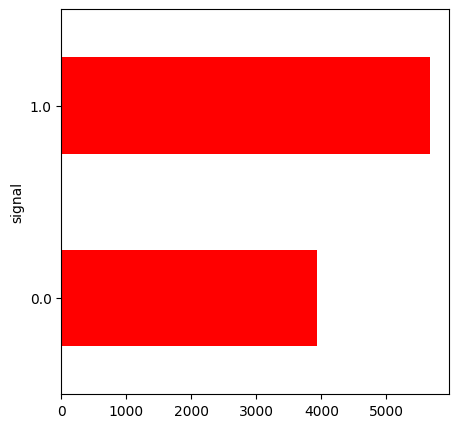

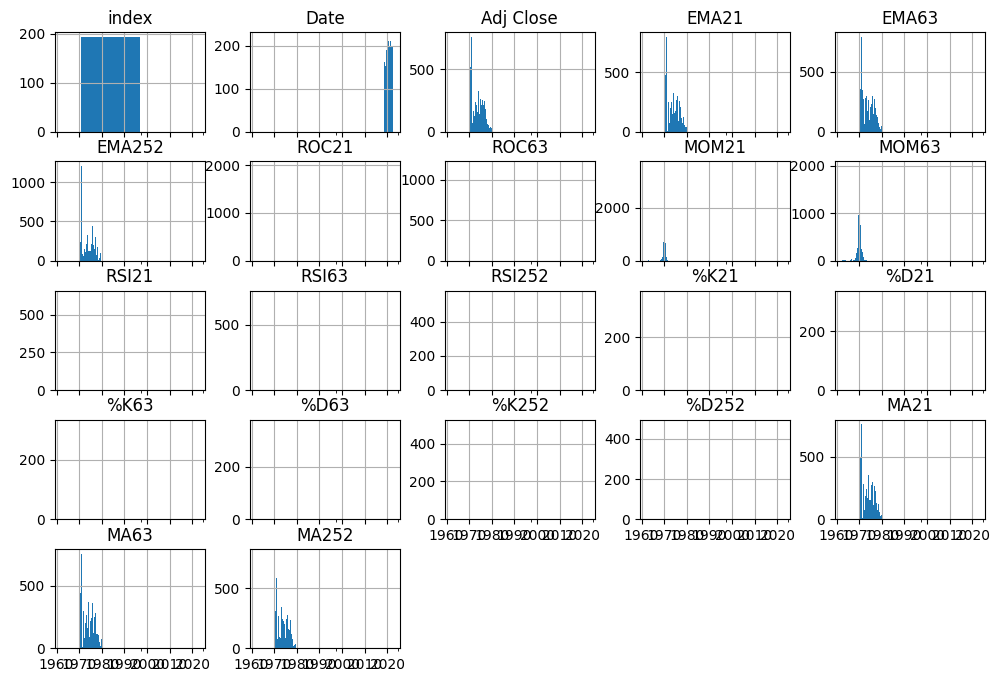

<ipython-input-119-a142e07f7c8b>:21: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



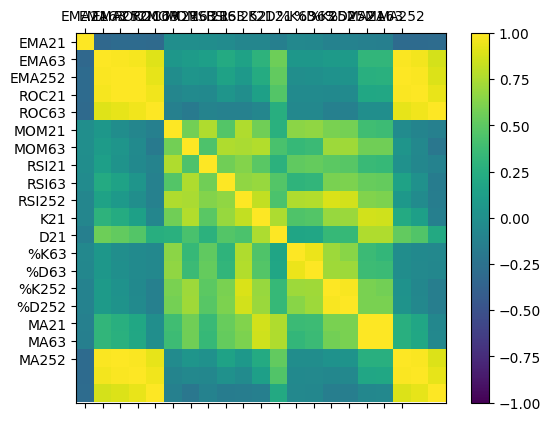

In [119]:
# daily_close_px = datas[['Close']].pivot(datas.Date, 'Symbol', 'Close')
# daily_close_px.plot(grid=True)
# plt.show()

fig = plt.figure()
fig.set_size_inches(5,5)
data_s = datasubs.groupby(['signal']).size()
names=['EMA21','EMA63','EMA252','ROC21','ROC63','MOM21','MOM63','RSI21','RSI63','RSI252','K21','D21','%K63','%D63','%K252','%D252','MA21','MA63','MA252']

print("upward  {}% out of {} total datasize".format(100* data_s[1]/(data_s[1]+data_s[0]), data_s[1]+data_s[0]))
plot = data_s.plot(kind='barh', color='red')
X=datasubs.drop(['signal'], axis=1).reset_index()
y=datasubs['signal']

# Plot the distributions of each input variable 
X.hist(bins=50, sharex=True, figsize=(12,8))

plt.show()


correlations = X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

##Feature selection
Feature selection is the process of selecting a subset of features that are most relevant for model construction which aid in creating an accurate predictive model. There are a wide range of feature selection algorithms, and these mainly fall in one of the three categories:

Filter method– selects features by assigning a score to them using some statistical measure. Wrapper method– evaluates different subset of features, and determines the best subset. Embedded method – This method figures out which of the features give the best accuracy while the model is being trained.

In our model, we will use filter method utilising the random.forest.importance function. The random.forest.importance function rates the importance of each feature in the classification of the outcome, i.e. class variable. The function returns a data frame containing the name of each attribute and the importance value based on the mean decrease in accuracy.

In [128]:
X_new=X.drop(['Date','Symbol','index'],axis=1)

In [129]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X_new, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

           Importance
Adj Close    1.768987
EMA21        1.937302
MA21         1.975526
EMA63        1.983634
MA63         2.267085
EMA252       2.343283
MOM21        2.407410
ROC21        2.601597
MA252        2.619353
RSI21        2.645479
%K63         2.876607
%K21         3.083955
%D21         3.236080
%D63         3.482124
RSI252       5.113109
%K252        8.075734
%D252        9.925223
RSI63       13.015536
MOM63       13.255472
ROC63       15.386504


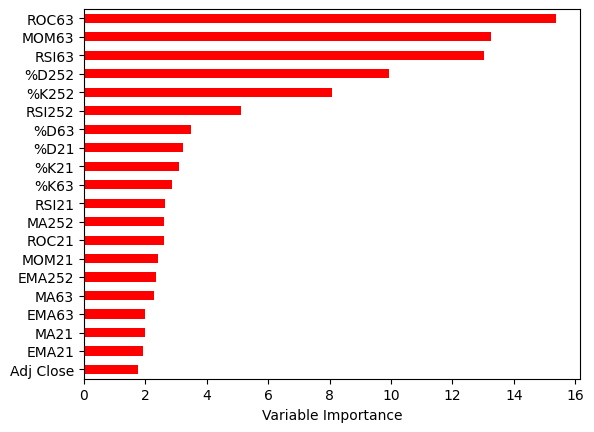

In [131]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X_new.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [132]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

##Splitting the data for model training 

In [137]:
X_1=datasub.drop(['signal','Date','Symbol'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.2, random_state=1)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
X_test_1=X_test.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(7685, 27) (7685,)
(1922, 27) (1922,)


In [175]:
X_graph=datasub.drop(['signal'],axis=1)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_graph, y, test_size=0.2, random_state=1)


###Modeling
In order to know which algorithm technic is the best for our strategy, we evaluate 5 non linear different methods:

1. K-Nearest Neighbors (KNN)
2. Classification and Regression Trees (CART)
3. Support Vector Machines (SVM)
4. Random Forest (RF)
5. Gaussian Naïve Bayes (NB)

To ensure the comparatibility of the results (use the same data splits), the random number (seed = 1) is reset before each run.

In [139]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    kfold = model_selection.KFold(n_splits=10, random_state=1,shuffle = True)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.947041 (0.007927)
CART: 0.917371 (0.011171)
SVM: 0.922969 (0.007720)
RF: 0.965777 (0.007088)
NB: 0.789198 (0.012277)


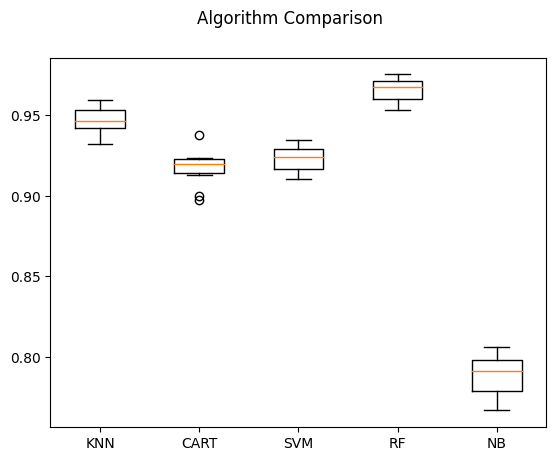

In [140]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### so clearly, randomforest performs well

In [141]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train_std, Y_train)

In [142]:
predr= rf.predict(X_test_std)
print(accuracy_score(Y_test, predr))
print(confusion_matrix(Y_test, predr))
print(classification_report(Y_test, predr))

0.9573361082206036
[[ 742   50]
 [  32 1098]]
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       792
         1.0       0.96      0.97      0.96      1130

    accuracy                           0.96      1922
   macro avg       0.96      0.95      0.96      1922
weighted avg       0.96      0.96      0.96      1922



In [143]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_test, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "yellow")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])

def result(es,threshold,X_train,X_test,y_train,y_test):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)

    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    plt.tight_layout()
    plt.show()
    
def btf1(es,X_test,y_test):
    thresholds = np.linspace(0.3,0.6,100)
    y_tpred = es.predict(X_test)
    score_set = []
    index_threshold = 0
    sum_score = 0
    for threshold in thresholds:
        y_tpred1  = (y_tpred > threshold).astype(int)
        score = f1_score(y_test, y_tpred1)
        score_set.append(score)
    for i in range(95):
        temp = sum(score_set[i:i+5])
        if temp > sum_score:
            sum_score = temp
            index_threshold = i+2 # the average threshold
    return thresholds[index_threshold],sum_score/5

def testf1(es,bestthreshold,X_test,y_test):
    y_tpred = es.predict(X_test)
    y_tpred1  = (y_tpred > bestthreshold).astype(int)
    score = f1_score(y_test, y_tpred1)
    return score


test f1: 0.9640035118525022 train f1: 0.9987900120998792


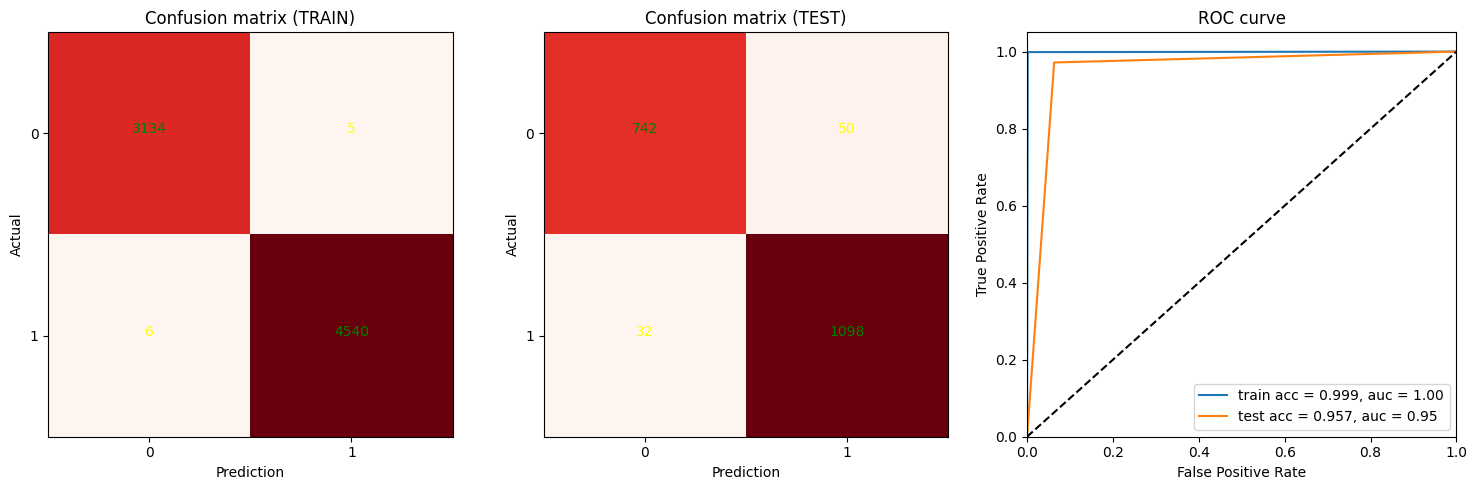

In [144]:

bestthreshold,bestf1 = btf1(rf,X_train_std, Y_train)
testf1 = testf1(rf,bestthreshold,X_test_std,Y_test)
print('test f1:',testf1,'train f1:',bestf1)
result(rf,bestthreshold,X_train_std,X_test_std, Y_train,Y_test)

,Date,Symbol,signal_pred,signal_actual,Market Returns,Actual Returns,Strategy Returns
4677,2021-07-27,HDFCBANK.NS,1.0,0.0,NaN,NaN,NaN
3686,2021-07-19,SBIN.NS,1.0,1.0,-0.702796,-0.000000,-0.702796
8990,2019-01-23,BPCL.NS,1.0,1.0,-0.165342,-0.165342,-0.165342
1984,2018-08-20,INFY.NS,0.0,0.0,0.937911,0.937911,0.937911
8022,2019-02-19,TATAMOTORS.NS,0.0,0.0,-0.763410,-0.000000,-0.000000


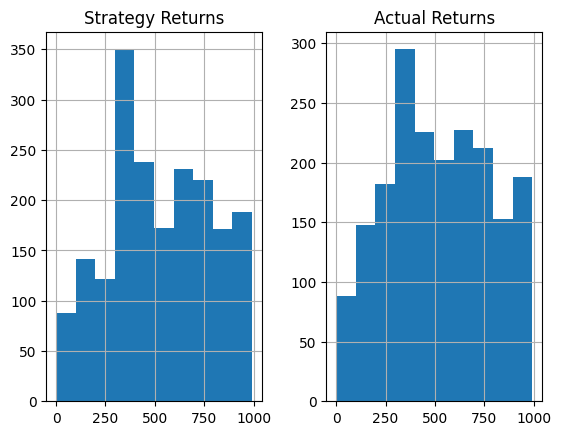

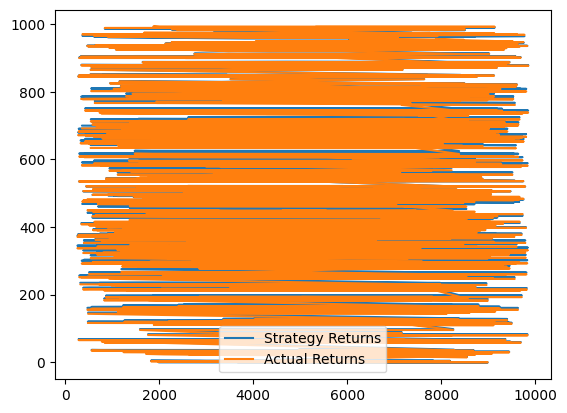

In [214]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_test2.index)
backtestdata['Date'] = X_test2.Date
backtestdata['Symbol'] = X_test2['Symbol']
backtestdata['signal_pred'] = predr
backtestdata['signal_actual'] = Y_test
backtestdata['Market Returns'] = X_test2['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
backtestdata.head()

In [212]:
backtestdata.dropna(axis = 0)
sum(((backtestdata['Actual Returns']-backtestdata['Strategy Returns'])**2)/len(backtestdata))

nan